In [296]:
import pandas as pd

In [297]:
data = pd.read_csv('Data/Woman_danger/women_danger.csv', sep=',')
data = data.rename(columns=lambda x: x.split('MostDangerousCountriesForWomen_')[1] if x != 'country' else x)
data.head()

,country,WomenPeaceAndSecurityIndex_Score_2023,WomensDangerIndexWDI_TotalScore_2019,WDIStreetSafety_2019,WDIIntentionalHomicide_2019,WDINonPartnerViolence_2019,WDIIntimatePartnerViolence_2019,WDILegalDiscrimination_2019,WDIGlobalGenderGap_2019,WDIGenderInequality_2019,WDIAttitudesTowardViolence_2019
0,India,0.595,541.25,41.0,30.0,19.0,83.0,44.0,79.0,100.0,74.0
1,China,0.700,444.55,23.0,6.0,70.0,86.0,44.0,78.0,29.0,80.0
2,United States,0.823,456.31,51.0,25.0,75.0,81.0,24.0,68.0,36.0,21.0
3,Indonesia,0.700,442.10,37.0,3.0,30.0,66.0,54.0,74.0,86.0,51.0
4,Pakistan,0.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
data.country

0                      India
1                      China
2              United States
3                  Indonesia
4                   Pakistan
               ...          
171                 Barbados
172    Sao Tome and Principe
173                    Samoa
174               Seychelles
175                    Tonga
Name: country, Length: 176, dtype: object

In [299]:
import pycountry

data['iso_alpha'] = data.apply(
    lambda row: pycountry.countries.get(name=row['country']).alpha_3 if pycountry.countries.get(
        name=row['country']) else 'change', axis=1)

In [300]:
data[['country', 'iso_alpha']][data['iso_alpha'] == 'change']

,country,iso_alpha
8,Russia,change
14,DR Congo,change
15,Vietnam,change
16,Iran,change
17,Turkey,change
21,Tanzania,change
28,South Korea,change
49,Ivory Coast,change
52,Venezuela,change
55,Syria,change


In [301]:
data = data.drop([17, 49], axis=0)

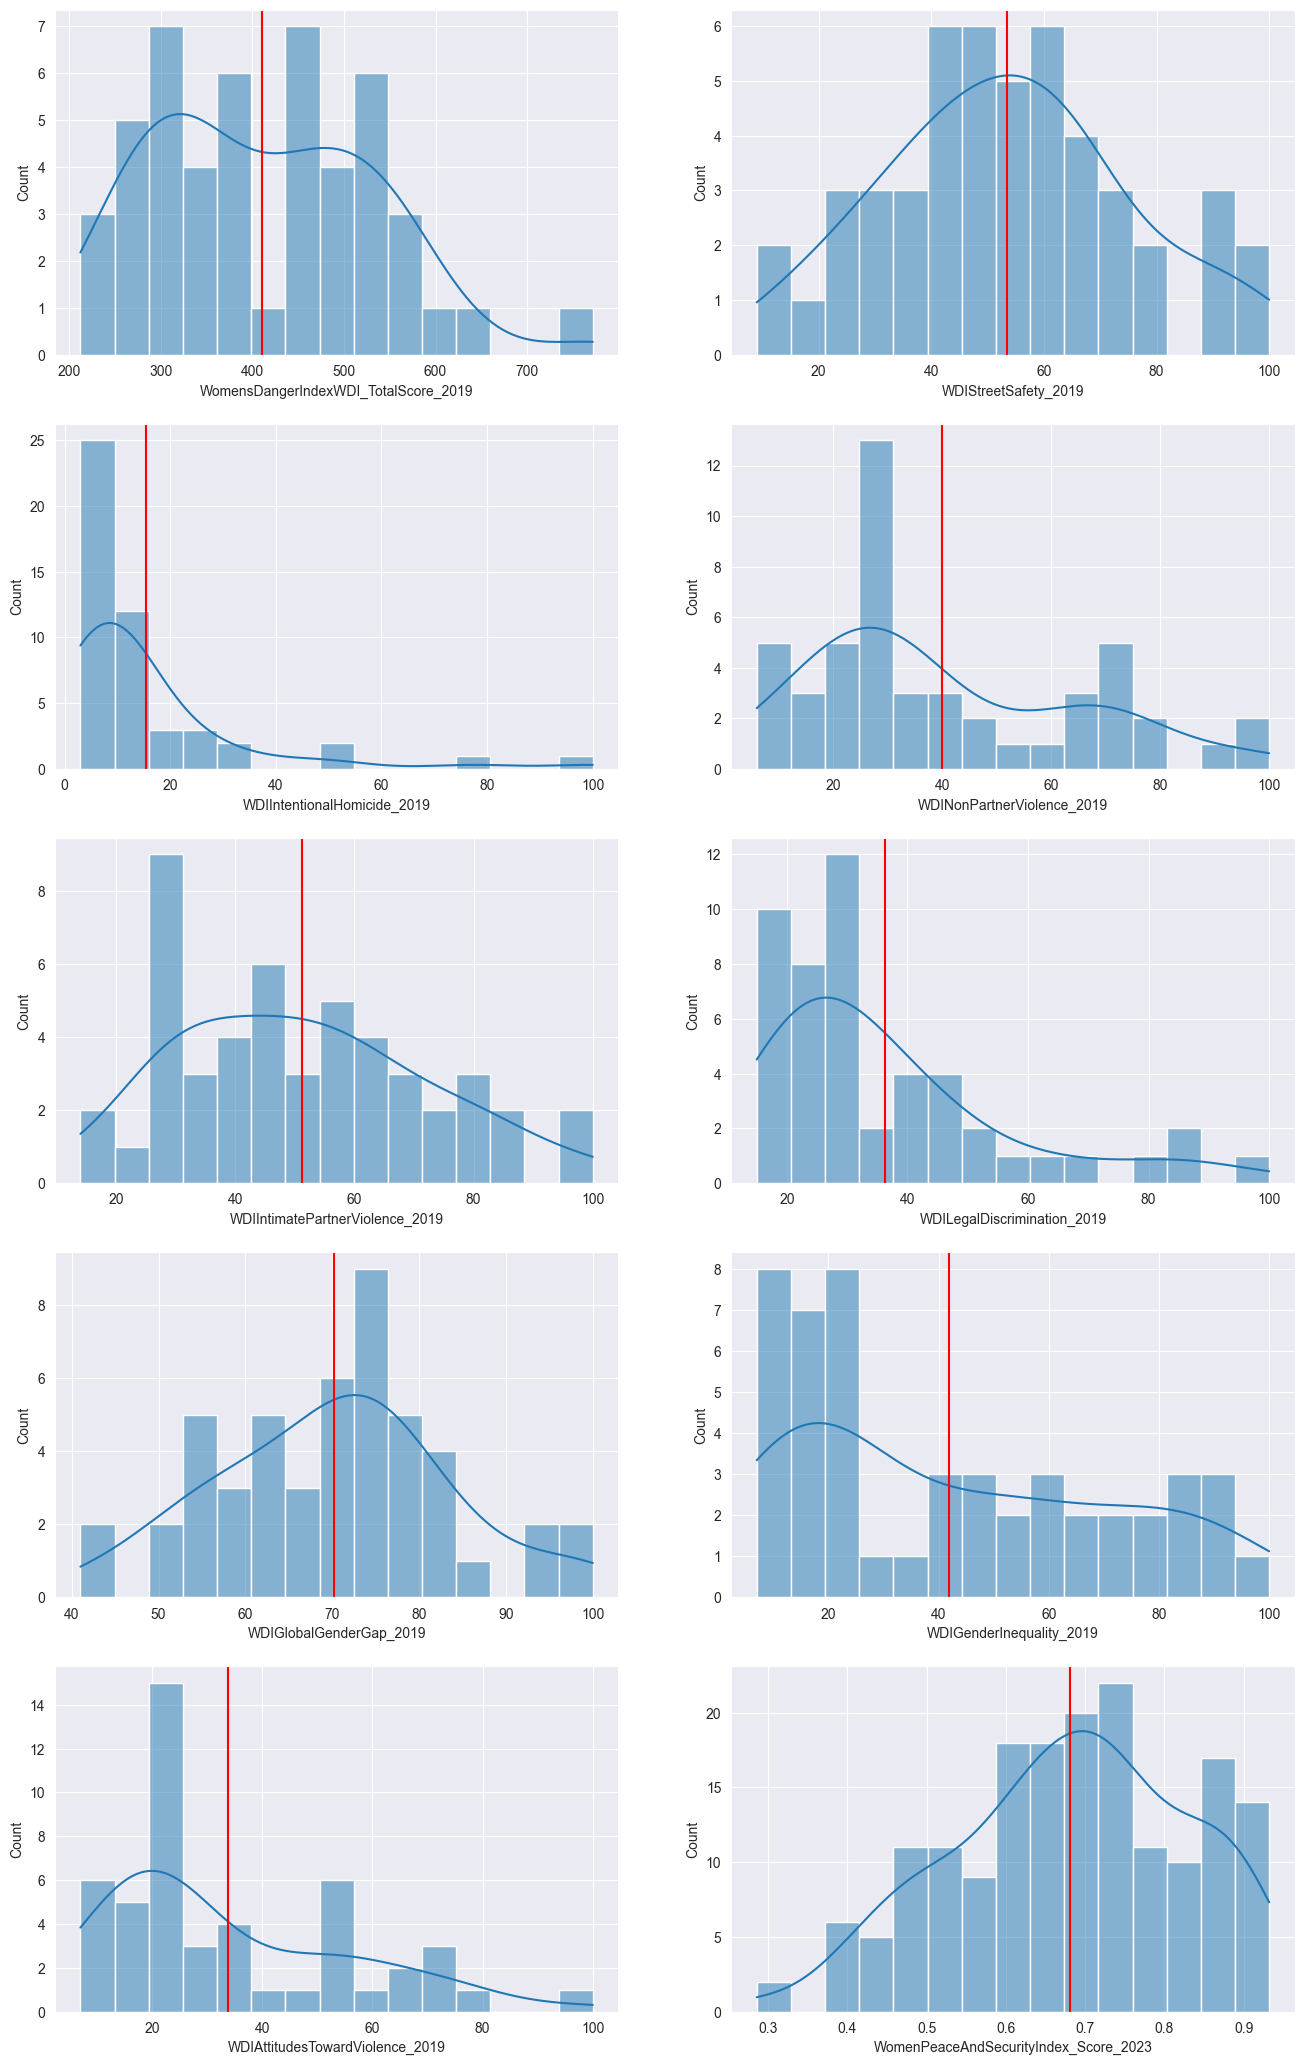

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

a, b = 5, 2
fig, ax = plt.subplots(nrows=a, ncols=b, figsize=(16, 26))

for i, col in enumerate(data.columns):
    if col not in ('country', 'iso_alpha'):
        sns.histplot(ax=ax[i // 2 - 1, i % 2], x=data[col], kde=True, bins=15)
        ax[i // 2 - 1, i % 2].axvline(data[col].mean(), color='red')

fig.subplots_adjust()

In [303]:
for col in data.columns:
    if col not in ('country', 'iso_alpha'):
        print(f'{col}:\n'
              f'Max - {data[col].max()} ({data.iloc[data[col].idxmax(), :].country})\n'
              f'Min - {data[col].min()} ({data.iloc[data[col].idxmin(), :].country})\n'
              f'Mean - {data[col].mean()}\n'
              f'Median -  {data[col].median()}', end='\n\n')

WomenPeaceAndSecurityIndex_Score_2023:
Max - 0.932 (Lebanon)
Min - 0.286 (Yemen)
Mean - 0.6810344827586208
Median -  0.693

WomensDangerIndexWDI_TotalScore_2019:
Max - 771.82 (Italy)
Min - 212.04 (Algeria)
Mean - 410.7908163265306
Median -  380.84

WDIStreetSafety_2019:
Max - 100.0 (Italy)
Min - 9.0 (Finland)
Mean - 53.36734693877551
Median -  53.0

WDIIntentionalHomicide_2019:
Max - 100.0 (Italy)
Min - 3.0 (Indonesia)
Mean - 15.510204081632653
Median -  9.0

WDINonPartnerViolence_2019:
Max - 100.0 (Italy)
Min - 6.0 (Uzbekistan)
Mean - 40.02040816326531
Median -  30.0

WDIIntimatePartnerViolence_2019:
Max - 100.0 (Angola)
Min - 14.0 (Poland)
Mean - 51.183673469387756
Median -  47.0

WDILegalDiscrimination_2019:
Max - 100.0 (Madagascar)
Min - 15.0 (Mexico)
Mean - 36.3469387755102
Median -  30.0

WDIGlobalGenderGap_2019:
Max - 100.0 (Iran)
Min - 41.0 (Palestine)
Mean - 70.18367346938776
Median -  71.0

WDIGenderInequality_2019:
Max - 100.0 (India)
Min - 7.0 (Laos)
Mean - 41.9183673469387

In [304]:
import plotly.express as px

for col in data.columns:
    if col not in ('country', 'iso_alpha'):
        fig = px.choropleth(data_frame=data, locations='iso_alpha',
                            color=col,
                            hover_name='country',
                            projection='natural earth',
                            title=col)
        fig.show()

# В изначальных данных неподходящие названия стран :(